#### Reading data 
Naji sent me a text file That I processed with python codes to generate dataframes


In [317]:
#!/bin/python
#
import re

structure_text_file='structures.txt'
samples=dict()

with open(structure_text_file,'r') as fh:
    lines =fh.readlines()    

# another comment 

#### Creating Python Dictionary
from data already read off the text file

In [318]:
name=''
count=0
for line in lines:
    
    if line.startswith('/'):
        count=count+1
        name=line.split('/')[-1].strip().split('.')[0].strip()
        samples[count]=dict()
        samples[count]['name']=name
        
    else:
        key,value=line.split("=")
        samples[count][key]=value.strip()
        
        

##  Data preprocessing
1. Removing likely unrelated data.
2. Re-ordering independent and result parameter

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 40)
df1=pd.DataFrame.from_dict(samples,orient='index')
df1.reset_index(drop=True, inplace=True)
df1=df1.drop(['name','Box volume ','Strain ','Displacement (x & y) ','Displacement (z) '],axis=1) # removing  unrelated data
df1['id'] = range(1, len(df1) + 1)
df1.head()



,Mesh volume,Rho,C11,C22,C33,C12,C13,C23,C44,C55,...,E1,E2,E3,nu12,nu13,nu23,mu23,mu13,mu12,id
0,345322.7689798011,0.043165346122475134,0.11035552355957358,0.09331165897852606,0.09504280902015454,0.05278984171587961,0.052062701007787655,0.048629559682231656,0.8232323361468934,0.0473408834742925,...,0.0718423758865318,0.06007298897043067,0.06221081931295994,0.38216439715640765,0.3522435310255481,0.34859099707052454,0.8232323361468934,0.0473408834742925,0.04888035506201445,1
1,357365.46845682024,0.044670683557102527,0.10617143949810734,0.09918641985748405,0.10736234663811096,0.049312284638048584,0.05328893997978546,0.04614831561875709,0.08628384612909565,0.22490776562387066,...,0.07093383220596787,0.07060329226099511,0.07461367605320639,0.3327872571460019,0.3533023428685621,0.28050572845183924,0.08628384612909565,0.22490776562387066,0.39394490995706727,2
2,360372.69797348813,0.04504658724668602,0.07193354729955323,0.08929505164845775,0.07828078474646538,0.0458720520574417,0.0318038593428175,0.03450355632019318,0.03694857299425585,0.400647691389732,...,0.04531657511011215,0.05689272910555098,0.06085058599165685,0.42995339569785185,0.21677015878490621,0.23686955147974376,0.03694857299425585,0.400647691389732,0.4130484399163377,3
3,345322.7689798011,0.043165346122475134,0.11361766771302749,0.0938024670913367,0.0955587273541434,0.052272525096486507,0.05042781240763302,0.04772399864538084,0.8232323361468934,0.0473408834742925,...,0.0765192029683098,0.0615347949933416,0.06455512431582351,0.38714541089421395,0.3343670036975093,0.35157473622316593,0.8232323361468934,0.0473408834742925,0.04888035506201445,4
4,357365.46845682024,0.044670683557102527,0.10617143949810734,0.09918641985748405,0.10736234663811096,0.049312284638048584,0.05328893997978546,0.04614831561875709,0.08628384612909565,0.22490776562387066,...,0.07093383220596787,0.07060329226099511,0.07461367605320639,0.3327872571460019,0.3533023428685621,0.28050572845183924,0.08628384612909565,0.22490776562387066,0.39394490995706727,5


#### Aspect Ratio Data from xlsx

reading the text file AR_per_structure.xlsx sent by Naji


In [320]:
# ! pip install openpyxl
df2=pd.read_excel('AR_per_structure.xlsx')
df2=df2.dropna(axis=1,how='all')
df2=df2.dropna(axis=0,how='all')
df2.columns = df2.iloc[0]
df2 = df2[1:]
df2['id'] = range(1, len(df2) + 1)
df2 = df2.loc[:, df2.columns.notna()]
df2.reset_index(drop=True, inplace=True)
df2 = df2.rename_axis(None, axis=1)
df2.head()



,a,b,AR,id
0,13.840443,0.241912,3.348169,1
1,14.079122,0.235956,3.322047,2
2,13.869349,0.244432,3.390113,3
3,15.818883,0.21378,3.381758,4
4,13.677275,0.244578,3.345158,5


## Creating the dataframe for analysis from originals 

In [321]:
# df = df1[['Mesh volume ', 'Rho ', 'C11 ', 'C22 ', 'C33 ', 'C12 ', 'C13 ', 'C23 ', 'C44 ', 'C55 ', 'C66 ', 'nu12 ', 'nu13 ', 'nu23 ','mu23 ', 'mu13 ', 'mu12 ', 'E1 ', 'E2 ', 'E3 ']]
#df = df1[[ 'C22 ', 'C33 ', 'nu12 ', 'nu13 ', 'nu23 ','mu23 ', 'mu13 ', 'mu12 ', 'E1 ']]
df1= df1[['Mesh volume ', 'Rho ', 'C11 ',  'E1 ','E2 ']]
df_input=pd.concat([df1,df2],axis=1)
# df_input = df_input[['Mesh volume ', 'a','b', 'Rho ','E1 ']]
df = df_input
df.columns

Index(['Mesh volume ', 'Rho ', 'C11 ', 'E1 ', 'E2 ', 'a', 'b', 'AR', 'id'], dtype='object')

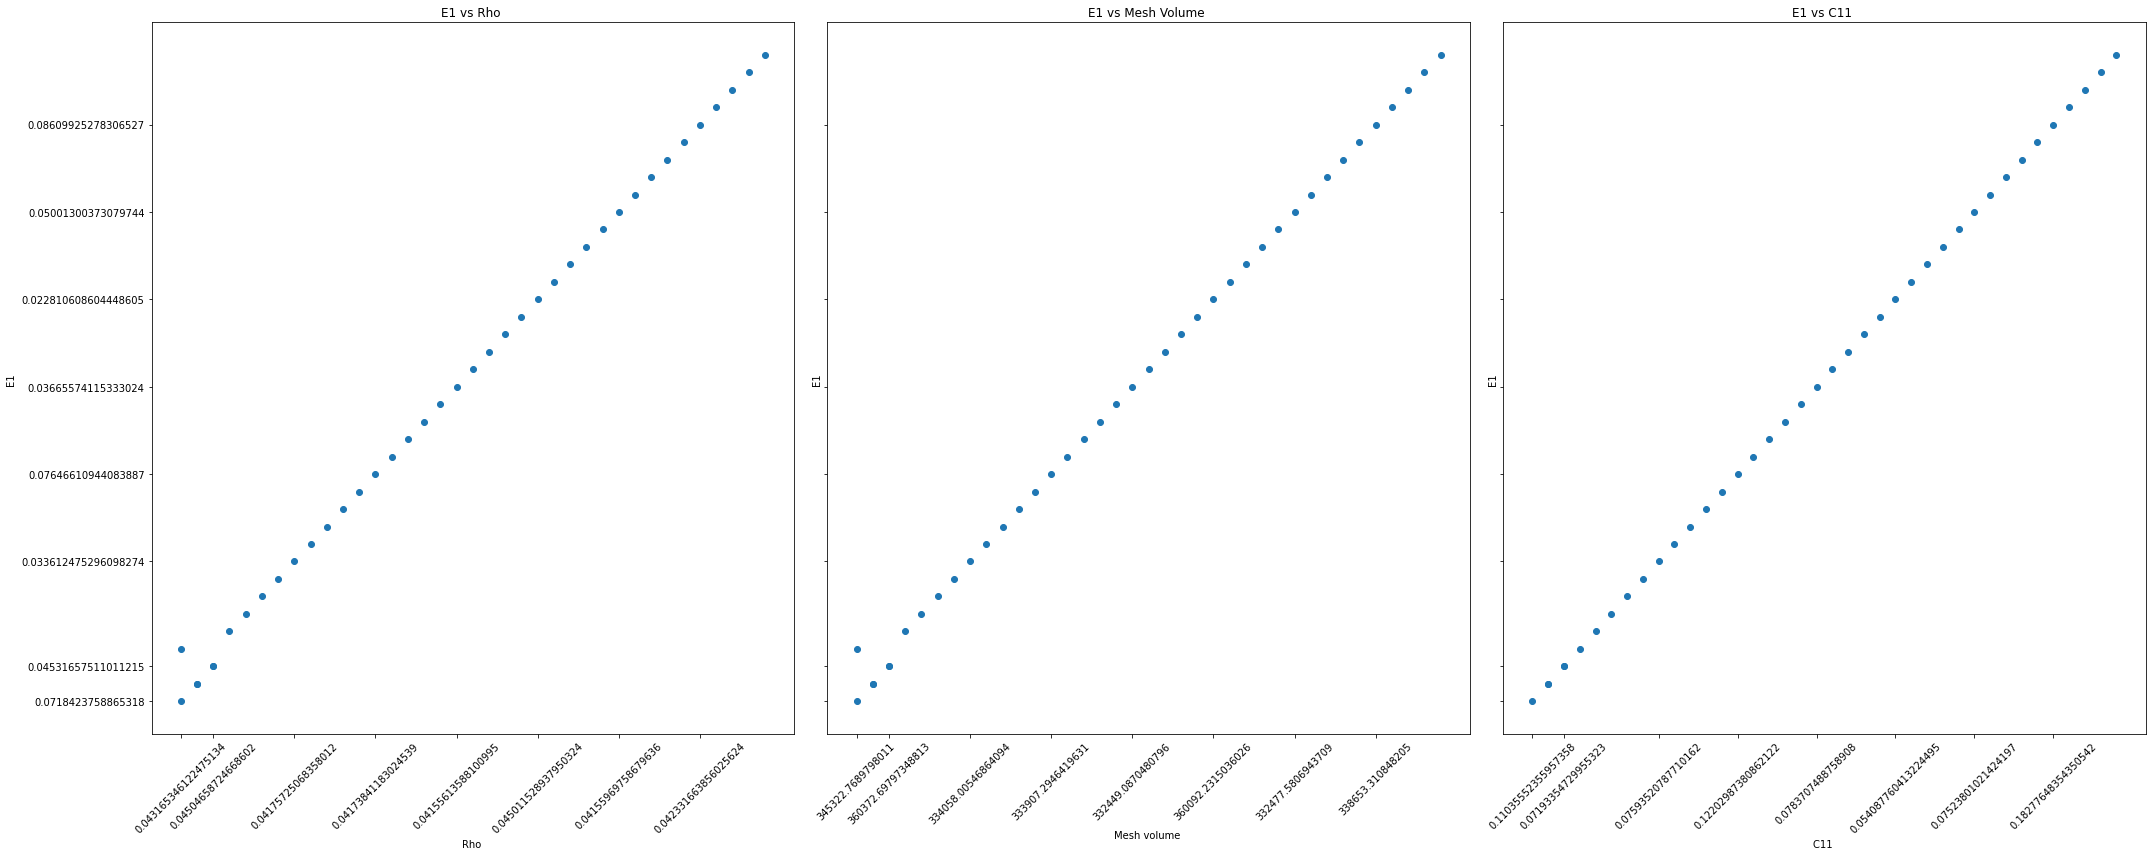

In [322]:

# First set of subplot two side by side windows on same row
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].scatter(df['Rho '],df['E1 '])
axs[0].set_xlabel('Rho ')
axs[0].set_ylabel('E1 ')
axs[0].title.set_text('E1 vs Rho ')
axs[0].set_xticks(np.array(df['Rho '])[0::5])
axs[0].set_xticklabels(np.array(df['Rho '])[0::5],rotation=45)


axs[1].scatter(df['Mesh volume '],df['E1 '])
axs[1].set_xlabel('Mesh volume ')
axs[1].set_ylabel('E1 ')
axs[1].title.set_text('E1 vs Mesh volume ')
axs[1].title.set_text('E1 vs Mesh Volume ')
axs[1].set_xticks(np.array(df['Mesh volume '])[0::5])
axs[1].set_xticklabels(np.array(df['Mesh volume '])[0::5],rotation=45)


axs[2].scatter(df['C11 '],df['E1 '])
axs[2].set_xlabel('C11 ')
axs[2].set_ylabel('E1 ')
axs[2].title.set_text('E1 vs C11 ')
axs[2].title.set_text('E1 vs C11 ')
axs[2].set_xticks(np.array(df['C11 '])[0::5])
axs[2].set_xticklabels(np.array(df['C11 '])[0::5],rotation=45)





plt.rcParams['figure.figsize'] = [30, 12]
plt.yticks(np.array(df['E1 '])[0::5])



plt.show()

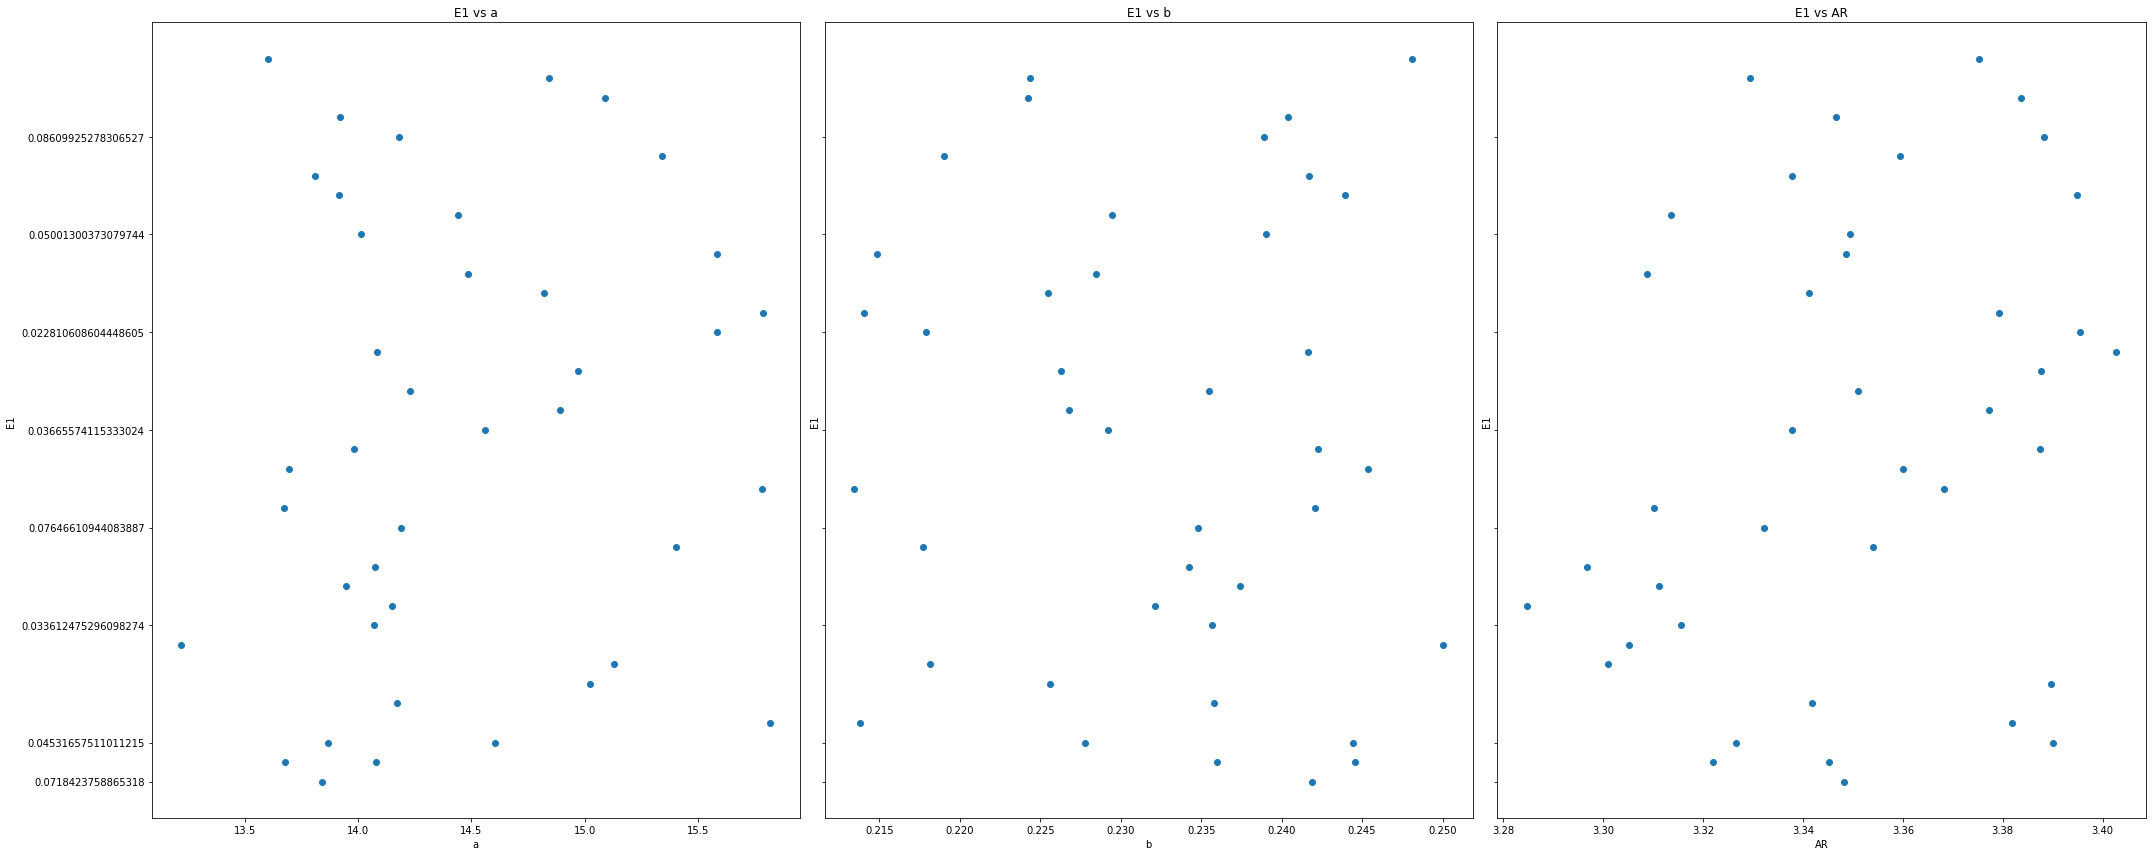

In [323]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].scatter(df['a'],df['E1 '])
axs[0].set_xlabel('a')
axs[0].set_ylabel('E1 ')
axs[0].title.set_text('E1 vs a')


axs[1].scatter(df['b'],df['E1 '])
axs[1].set_xlabel('b')
axs[1].set_ylabel('E1 ')
axs[1].title.set_text('E1 vs b')

axs[2].scatter(df['AR'],df['E1 '])
axs[2].set_xlabel('AR')
axs[2].set_ylabel('E1 ')
axs[2].title.set_text('E1 vs AR')
plt.rcParams['figure.figsize'] = [30, 12]
plt.yticks(np.array(df['E1 '])[0::5])



plt.show()

## Setting up regression model 

Assume E1 to be the result.
All rows left of it to be components that is analyzed

https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

In [324]:
X=df.drop(['E1 ','E2 ','id','C11 '],axis=1)
y=df["E1 "]


In [325]:
X.head()

,Mesh volume,Rho,a,b,AR
0,345322.7689798011,0.043165346122475134,13.840443,0.241912,3.348169
1,357365.46845682024,0.044670683557102527,14.079122,0.235956,3.322047
2,360372.69797348813,0.04504658724668602,13.869349,0.244432,3.390113
3,345322.7689798011,0.043165346122475134,15.818883,0.21378,3.381758
4,357365.46845682024,0.044670683557102527,13.677275,0.244578,3.345158


In [326]:
from sklearn import preprocessing
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler() 
X_scaled= s_scaler.fit_transform(X) #Standardize features by removing the mean and scaling to unit variance.
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=25) # test data =20%


#### Decision tree

In [327]:
dtr = DecisionTreeRegressor()
# fit the model
dtr.fit(X, y)

DecisionTreeRegressor()

#### Random Forest

In [328]:

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)



RandomForestRegressor()

#### Linear regression

In [329]:

lr = LinearRegression()
# fit the model
lr.fit(X, y)

LinearRegression()

#### Logistic regression

In [330]:
lgr = LogisticRegression()
# fit the model
lgr.fit(X, y)

LogisticRegression()

#### Plots with Regression

Tree based Regression Models


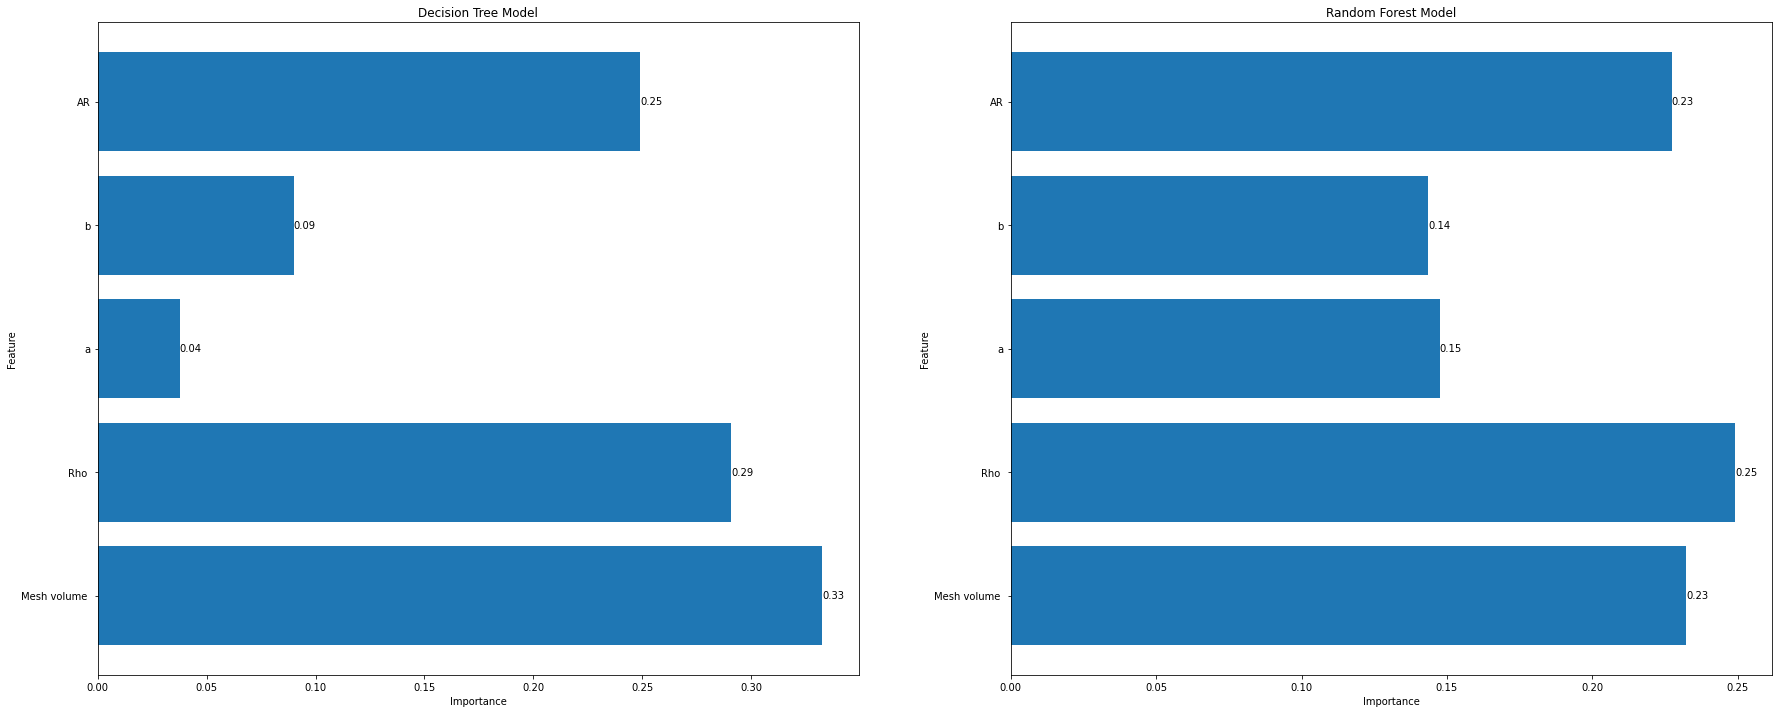

In [331]:

fig, axs = plt.subplots(1, 2)


axs[0].title.set_text('Decision Tree Model')
hbars=axs[0].barh(X.columns, dtr.feature_importances_)
axs[0].set_xlabel('Importance')
axs[0].set_ylabel('Feature')
axs[0].bar_label(hbars,fmt='%.2f')


axs[1].title.set_text('Random Forest Model')
hbars=axs[1].barh(X.columns, rf.feature_importances_)
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Feature')
axs[1].bar_label(hbars,fmt='%.2f')
plt.show()



Linear regression Models

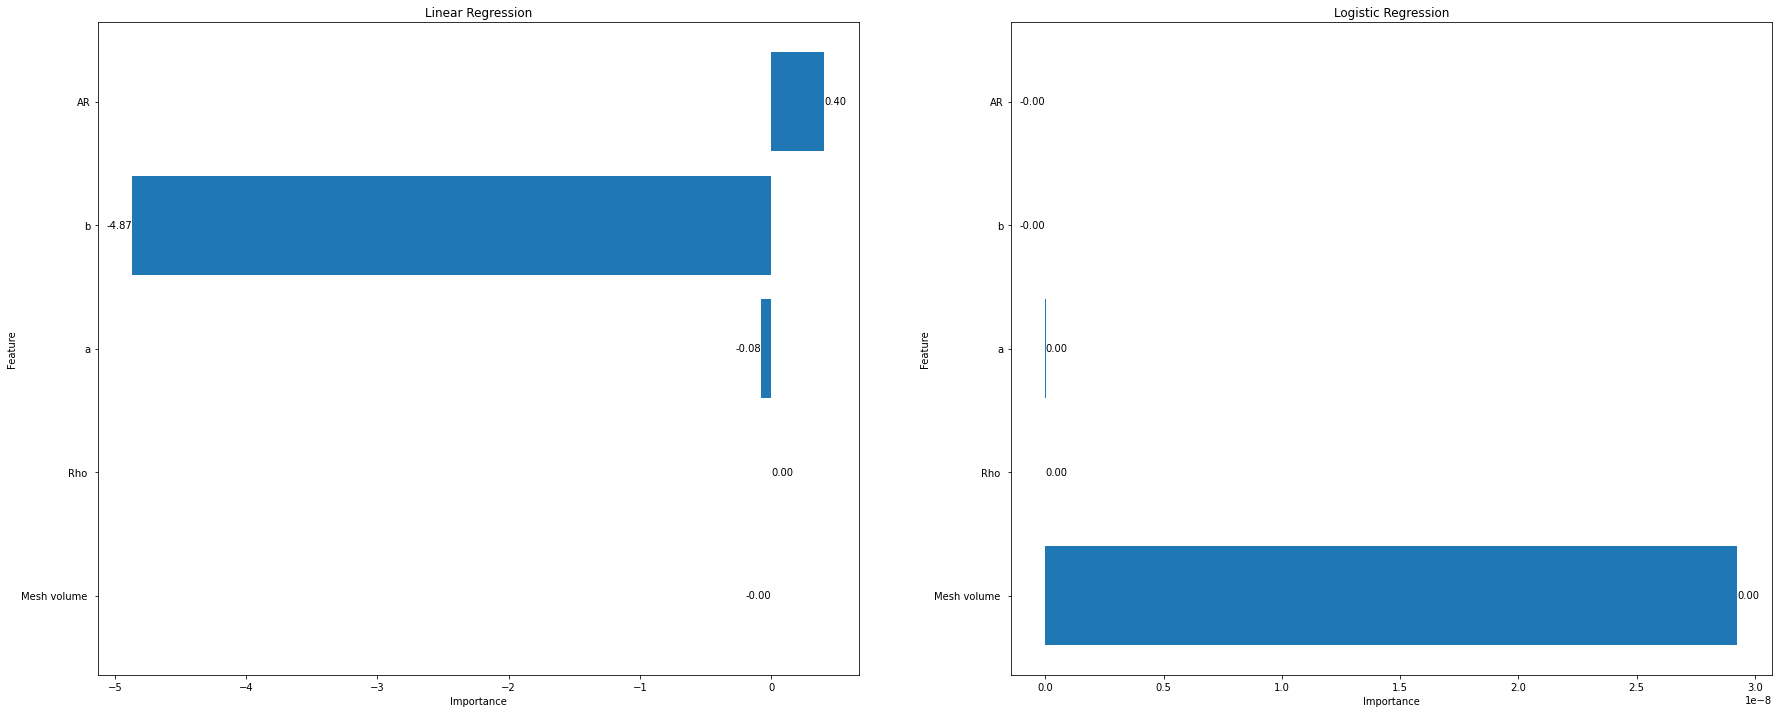

In [332]:
fig, axs = plt.subplots(1, 2)




axs[0].title.set_text('Linear Regression')
hbars=axs[0].barh(X.columns, lr.coef_)
axs[0].set_xlabel('Importance')
axs[0].set_ylabel('Feature')
axs[0].bar_label(hbars,fmt='%.2f')

axs[1].title.set_text('Logistic Regression')
hbars=axs[1].barh(X.columns, lgr.coef_[0])
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Feature')
axs[1].bar_label(hbars,fmt='%.2f')

plt.show()


In [333]:
# sort = dtr.feature_importances_.argsort()
# print(X.columns[sort], dtr.feature_importances_[sort])

# hbars=barh(X.columns[sort], dtr.feature_importances_[sort])
# plt.xlabel("Feature Importance")

### Remove C11 and then retry

From above analysis it is evident that C11, Mesh Volume and Rho has direct relation to E1 or strength of the material. However  AR may or May not have a direct relation ship to material strength. We donot see any linear relationship from scater plots but the Tree based models show some significance. IN the follwing section we remove C11 and then try to find our maximum imporatant features.

In [334]:
X=df.drop(['E1 ','E2 ','id','C11 '],axis=1)
y=df["E1 "]